In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
def curve(A,B,C):
    """Plots a parametric curve"""
    t = np.linspace(0,2*np.pi,1000)
        
    x = A*np.sin(t)*np.sin(t)*np.sin(t)
    y = B*np.cos(t) - C*np.cos(2*t)
    plt.axis('equal')
    
    return plt.plot(x,y)

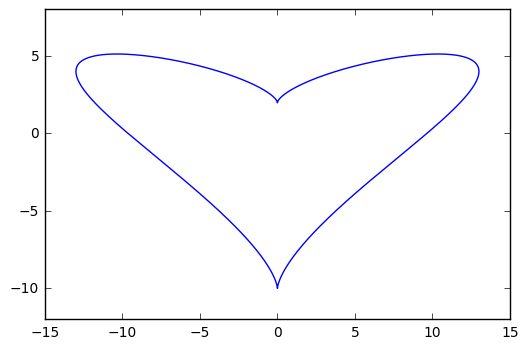

In [116]:
curve(13,6,4)

In [117]:
# Question 2
def power_series(a,x):
    """takes 2 input parameters a and x where a is a 1-dimensional NumPy array representing
    a sequence a_0, a_1, . . . , a_N and x is a number, and the function returns the (partial) power series sum"""
    Length_a = len(a)
    xk = np.array([x**k for k in range(0,Length_a)])
    inside_product = xk * a
    return np.sum(inside_product)



In [118]:
power_series(np.ones(100),0.5)

2.0

In [119]:
from scipy.special import factorial

In [120]:
power_series(1 / factorial(np.arange(0,100)),1)

2.7182818284590451

#### Question 3 a

$$f_{triangle}(t)=\frac{8}{\pi^{2}}\sum_{k=0}^{\infty}(-1)^{k}\dfrac{sin(2\pi(2k+1)t)}{(2k+1)^2}$$

In [121]:
# Question 3 b
def square_wave(N,interval):
    """Takes a positive integer N and a Python list interval of length 2 
    and plots the Nth partial sum of the Fourier series"""
    a = interval[0]
    b = interval[1]
    
    x = np.linspace(a,b,(b-a)*(N+1)*50)
    
    y = (8/np.pi**2) * sum([ ((-1)**k)*np.sin(2*np.pi*(2*k+1)*x)/(2*k+1)**2 for k in range(0,N+1) ])
    plt.plot(x,y)
    plt.ylim([-2,2])
    plt.grid('on')
    

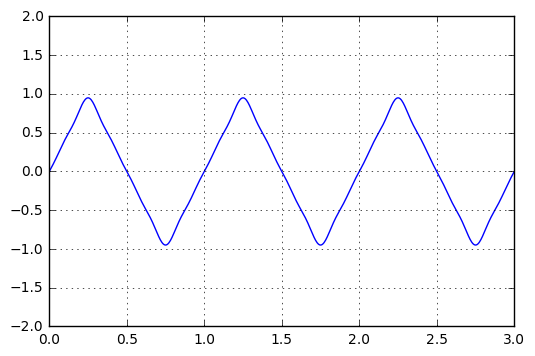

In [122]:
square_wave(3,[0,3])

#### Question 4 a

$$f_{sawtooth}(t)=\dfrac{2}{\pi}\sum_{k=1}^{\infty}\frac{(-1)^{k+1} sin(2{\pi}kt)}{k}$$

In [123]:
# Question 4

def sawtooth_waves(n,m,T):
    """Takes 3 parameters n, m and T and creates a n by m grid of subplots (with nm total plots)
    where the Nth partial sum of the Fourier series is plotted in the Nth subplot position over the interval [0, T]."""
    plt.figure(figsize=(T*m,T*n))
    l=2/np.pi
    y = 0
    x = np.linspace(0,T,1000)
    for k in range(1,n*m+1):
        plt.subplot(n,m,k)
        
        y=y+((((-1)**(k+1))*(np.sin(2*np.pi*k*x)))/k)
        
        plt.plot(x,l*y)
        
        plt.title('N = ' + str(k)), plt.tight_layout(), 
        plt.grid('on')
    

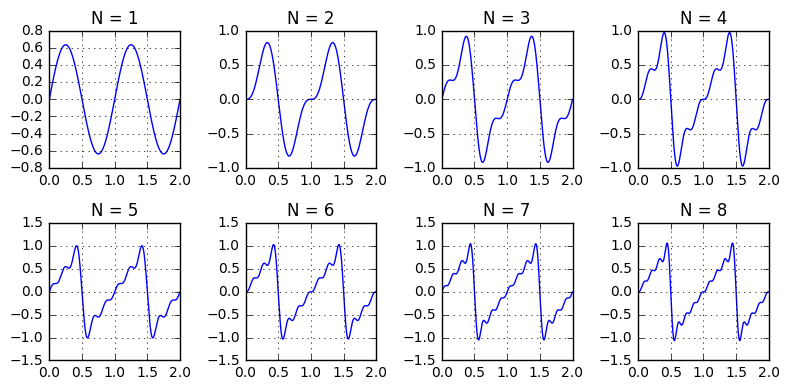

In [124]:
sawtooth_waves(2,4,2)

#### Question 5 a

$$ \varsigma(s)=\sum_{n=1} ^\infty\frac{1}{n^s}= \prod_{p \space prime}\frac{1}{1-p^{-s}}=\frac{1}{1-2^{-s}}\cdot \frac{1}{1-3^{-s}}\cdot \frac{1}{1-5^{-s}}\cdot\frac{1}{1-7^{-s}}\cdots\frac{1}{1-p^{-s}}\cdots $$

In [125]:
# Is prime function:
def is_prime(N):
    """Determine whether or not N is a prime number."""
    if N <= 1:
        return False
    # N is prime if N is only divisible by 1 and itself
    # We should test whether N is divisible by d for all 1 < d < N
    for d in range(2,N):
        # Check if N is divisible by d
        if N % d == 0:
            return False
    # If we exit the for loop, then N is not divisible by any d
    # Therefore N is prime
    return True    

In [126]:
# Question 5
def euler_product(s,N):
    """Takes 2 input parameters s and N and computes the partial Euler product"""
    List_of_primes = []
    List_of_results = []
    for a in range(2,N):
        if is_prime(a):
            List_of_primes.append(a)
    
    for k in List_of_primes:
        individual_result = 1 / (1-(k**(-s)))
        List_of_results.append(individual_result)
    return np.product(List_of_results)
   

In [127]:
euler_product(4,10000)

1.0823232337111559

In [128]:
# Question 6
def slope_field(f,tlims,ylims,grid_step):
    """Returns the slope field for the equation y' = f(t, y)."""
    t_0, t_1 = tlims
    y_0, y_1 = ylims
    t = np.arange(t_0,t_1+grid_step,grid_step)
    y = np.arange(y_0,y_1+grid_step,grid_step)
    
    for y_value in y:
        for t_value in t:
            m = f(t_value,y_value)
            L = grid_step*0.6
            dt = L/np.sqrt(1+m**2)
            dy = m*dt
            ts = [t_value, t_value + dt]
            ys = [y_value, y_value + dy]
            plt.plot(ts,ys,'b')
    plt.xlim([t_0,t_1])
    plt.ylim([y_0,y_1])
    plt.show()

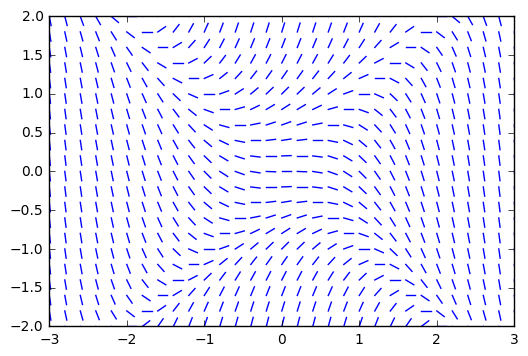

In [129]:
def f(t,y):
    return y**2 - t**2

slope_field(f,[-3,3],[-2,2],0.2)

$$
\sum_{k=1}^{\infty} \dfrac{1}{k(2k+1)^2}=4-\dfrac{\pi^2}{4}-2\ln(2)
$$

In [ ]:
def k_sum(N):
    answer_list = []
    for k in range(1,N+1):
        answer = 1 / (k*(2*k + 1)**2)
        answer_list.append(answer)